In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle

In [14]:
# Import the dataframe
df: pd.DataFrame = pd.read_csv('Datasets/trainingdata.csv')

In [15]:
# Data preparation
X = df.drop('dienstperiode', axis=1)  
y = df['dienstperiode'] 

#Train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stap 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model building and training
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [16]:
#Voorspellingen
y_pred = knn_model.predict(X_test_scaled)

# Evaluatie
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Gedetailleerd rapport
print(classification_report(y_test, y_pred))

Accuracy: 0.27
              precision    recall  f1-score   support

           0       0.36      0.48      0.41       357
           1       0.31      0.35      0.33       439
           2       0.26      0.33      0.29       389
           3       0.26      0.26      0.26       451
           4       0.28      0.32      0.30       441
           5       0.29      0.30      0.29       436
           6       0.22      0.22      0.22       459
           7       0.27      0.31      0.29       444
           8       0.25      0.28      0.26       460
           9       0.27      0.26      0.27       465
          10       0.26      0.27      0.26       489
          11       0.26      0.27      0.27       497
          12       0.28      0.26      0.27       517
          13       0.31      0.31      0.31       466
          14       0.29      0.27      0.28       444
          15       0.28      0.30      0.29       424
          16       0.25      0.23      0.24       429
          17

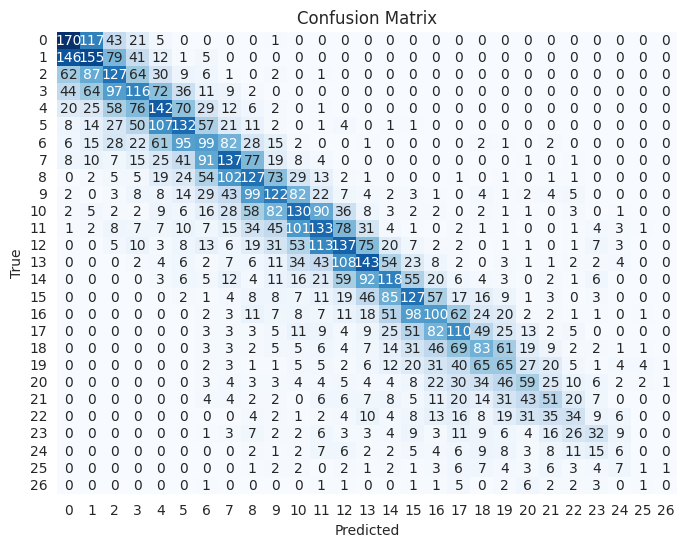

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Assume y_pred is your predicted values
y_pred_adjusted = np.maximum(y_pred, 2)

# Calculate the percentage of predictions within 30%
percentage_within_30_percent = np.sum(np.abs(y_test - y_pred_adjusted) <= 0.30 * y_test) / len(y_test) * 100

print(f"Adjusted percentage of predictions within 30% of actual dienstperiode (with minimum of 2 years): {percentage_within_30_percent:.2f}%")

Adjusted percentage of predictions within 30% of actual dienstperiode (with minimum of 2 years): 72.69%


In [19]:
pickle.dump(knn_model, open("saved_model.sav", "wb"))